In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
import pandas as pd

# Define file path (inside 'Colab Notebooks' folder)
file_path = "/content/drive/My Drive/Colab Notebooks/restaurant_recommendation_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Loaded Successfully!")
print(df.head())


Dataset Loaded Successfully!
   user_id  restaurant_id         restaurant_name   cuisine_type  rating  \
0    15796           1174   Golden Dragon Chinese        Chinese     3.0   
1      861           1928           Seafood Shack        Seafood     3.8   
2    38159           1349  Mediterranean Delights  Mediterranean     3.2   
3    44733           3708           Biryani Point         Indian     5.0   
4    11285           3361         Grill House BBQ            BBQ     3.6   

   order_amount  popularity_score  user_age  delivery_time  previous_orders  \
0         50.81             0.373      43.2          29.70                9   
1         21.77             0.824      24.2          43.14               15   
2         72.21             0.528      31.5          27.75               10   
3         31.99             0.895      26.6          36.97                9   
4         15.09             0.711      33.5          28.43                8   

   discount_applied  
0             22.

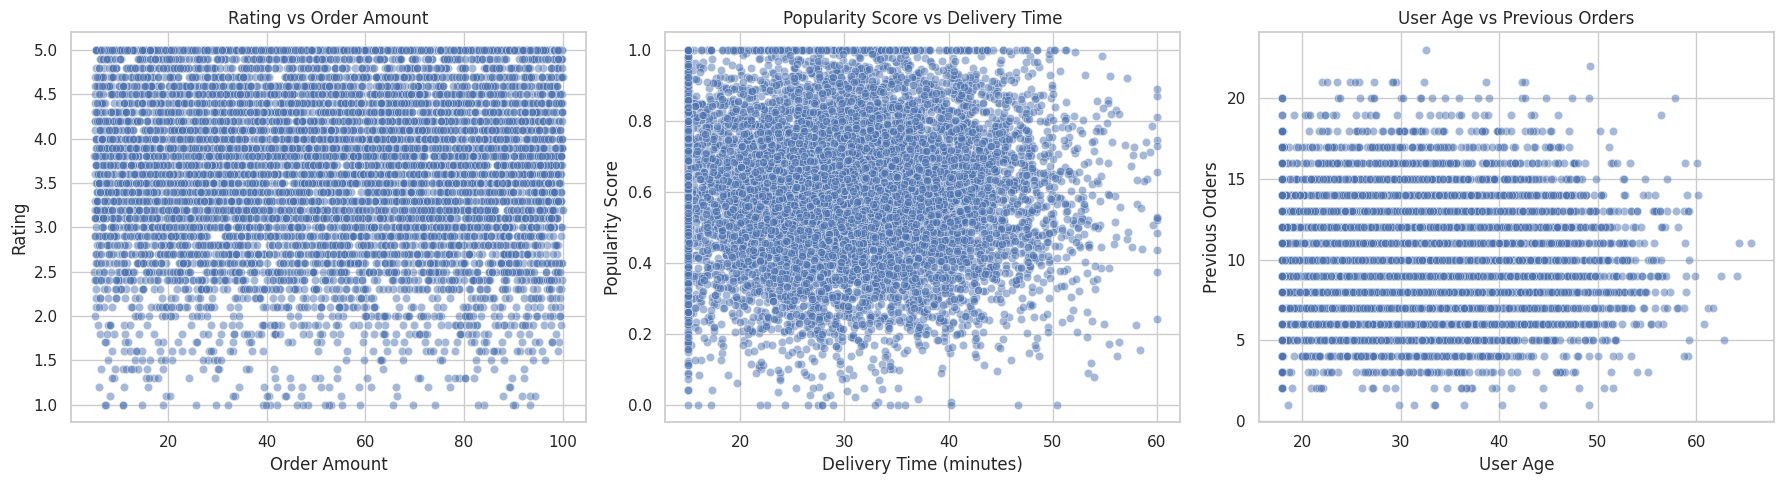

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's already loaded in 'df')
df_sampled = df.sample(frac=0.1, random_state=42)  # Use only 10% of the data

# Set style
sns.set(style="whitegrid")

# Create subplots for multiple scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter Plot 1: Rating vs Order Amount
sns.scatterplot(ax=axes[0], x=df_sampled["order_amount"], y=df_sampled["rating"], alpha=0.5)
axes[0].set_title("Rating vs Order Amount")
axes[0].set_xlabel("Order Amount")
axes[0].set_ylabel("Rating")

# Scatter Plot 2: Popularity Score vs Delivery Time
sns.scatterplot(ax=axes[1], x=df_sampled["delivery_time"], y=df_sampled["popularity_score"], alpha=0.5)
axes[1].set_title("Popularity Score vs Delivery Time")
axes[1].set_xlabel("Delivery Time (minutes)")
axes[1].set_ylabel("Popularity Score")

# Scatter Plot 3: User Age vs Previous Orders
sns.scatterplot(ax=axes[2], x=df_sampled["user_age"], y=df_sampled["previous_orders"], alpha=0.5)
axes[2].set_title("User Age vs Previous Orders")
axes[2].set_xlabel("User Age")
axes[2].set_ylabel("Previous Orders")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [9]:
# Compute correlation matrix on numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Display correlation coefficients
print(correlation_matrix)

                   user_id  restaurant_id    rating  order_amount  \
user_id           1.000000      -0.004665 -0.001893      0.004174   
restaurant_id    -0.004665       1.000000  0.000022     -0.003305   
rating           -0.001893       0.000022  1.000000     -0.001082   
order_amount      0.004174      -0.003305 -0.001082      1.000000   
popularity_score -0.003917       0.000675 -0.000721     -0.000366   
user_age          0.000571       0.000504  0.001018      0.000441   
delivery_time    -0.001048      -0.003885  0.003270      0.005776   
previous_orders   0.001886      -0.000813  0.005748     -0.000942   
discount_applied -0.000312       0.001179 -0.001960     -0.002573   

                  popularity_score  user_age  delivery_time  previous_orders  \
user_id                  -0.003917  0.000571      -0.001048         0.001886   
restaurant_id             0.000675  0.000504      -0.003885        -0.000813   
rating                   -0.000721  0.001018       0.003270         0

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to categorical columns
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the encoded datafrae
print(df.head())


   user_id  restaurant_id  restaurant_name  cuisine_type  rating  \
0    15796           1174                5             2     3.0   
1      861           1928               13            13     3.8   
2    38159           1349                9            11     3.2   
3    44733           3708                1             7     5.0   
4    11285           3361                6             1     3.6   

   order_amount  popularity_score  user_age  delivery_time  previous_orders  \
0         50.81             0.373      43.2          29.70                9   
1         21.77             0.824      24.2          43.14               15   
2         72.21             0.528      31.5          27.75               10   
3         31.99             0.895      26.6          36.97                9   
4         15.09             0.711      33.5          28.43                8   

   discount_applied  
0             22.64  
1             18.56  
2             34.92  
3             11.46  
4     

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to all numerical columns
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the normalized dataframe
print(df_normalized.head())


    user_id  restaurant_id  restaurant_name  cuisine_type  rating  \
0  0.315913       0.234694         0.263158        0.1250    0.50   
1  0.017201       0.385554         0.684211        0.8125    0.70   
2  0.763191       0.269708         0.473684        0.6875    0.55   
3  0.894676       0.741697         0.052632        0.4375    1.00   
4  0.225689       0.672269         0.315789        0.0625    0.65   

   order_amount  popularity_score  user_age  delivery_time  previous_orders  \
0      0.482211             0.373  0.484615       0.326667             0.36   
1      0.176526             0.824  0.119231       0.625333             0.60   
2      0.707474             0.528  0.259615       0.283333             0.40   
3      0.284105             0.895  0.165385       0.488222             0.36   
4      0.106211             0.711  0.298077       0.298444             0.32   

   discount_applied  
0            0.5660  
1            0.4640  
2            0.8730  
3            0.2865  


In [12]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_normalized.drop(columns=["rating"])  # Features
y = df_normalized["rating"]  # Target (User Rating)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (80000, 10), Testing set: (20000, 10)
